# Машинска обрада текстуалних података

Текстуални подаци се најбоље обрађују тако што их неко прочита са разумевањем. Наравно, то људи још увек боље раде него машине. Ипак, има много ситуација када тај посао морамо да препустимо машини. На пример, када имамо десет секунди да обрадимо текст или када треба обрадити хиљаду фајлова. Помоћ машине је тада више него добродошла.

Машине могу да "читају" текст на два начина: да раде по инструкцијама или да им објаснимо шта је циљ па да саме уче. Ово друго је већ у домену машинског учења и тиме се нећемо бавити у овој лекцији. Уместо тога бавићемо се једноставнијим алгоритмима чије је исходе лакше протумачити. 

Текстуални подаци са којима се најчешће сусрећемо у јавној управи су они који нису структурирани и смештени у базе података или табеле. Углавном су то документи, текстуални записи у неколико различитих формата које чувамо на разним местима. За тако организоване податке једноставних алата за обраду и анализу. Морамо да уложимо труд да текстови буду у формату који је машински читљив.

### Текстуални подаци у табели
Текстуални подаци приказани у табели се лакше обрађују и анализирају него чист текст јер је неко већ разврстао делове текста и придружио их атрибутима који су описани називима колона. Ово је структура какву прижељкујемо када радимо са текстом. 

За ову вежбу ћемо користити табелу која нам је већ позната -- "Општински показатељи последње стање". Учитајте је са Портала отворених података. Ако се деси да Портал не ради, учитајте исти тај фајл који је на време преузет.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#df=pd.read_csv("http://opendata.stat.gov.rs/data/WcfJsonRestService.Service1.svc/dataset/03IND01/1/csv",sep=";")
df=pd.read_csv("data/03IND01.csv",sep=";")

Шта све постоји од атрубута то можемо да видимо у заглављу помоћу функције `head()`. Сада ћемо изабрати погодан текстуални податак за анализу. Име председника општине изгледа као згодан података за обраду. Проблем је само што се вредности у колони __vrednost__ не односе увек на име председника општине. Има ту и других индикатора.

In [3]:
df.head()

,IDIndikator,Indikator,mes,god,idter,nter,vrednost,CreateDate,LastUpdate,IDLegenda,nIzvorI
0,IND00M01,Градоначелник/председник општине,1,2021,70017,Александровац,МИРКО МИХАЈЛОВИЋ,1/4/2021 7:39:27 AM,1/4/2021 7:39:27 AM,A,Републички завод за статистику (РЗС)
1,IND01G01,Површина (у км²),0,2020,70017,Александровац,387,1/27/2021 10:15:39 AM,1/27/2021 10:22:18 AM,A,Републички геодетски завод (РГЗ)
2,IND01G02,Број становника - процена (последњи расположив...,0,2019,70017,Александровац,23898,7/1/2020 1:01:17 PM,7/1/2020 1:01:17 PM,A,Републички завод за статистику (РЗС)
3,IND01G03,Густина насељености (број становника / км2),0,2019,70017,Александровац,62,7/1/2020 1:01:17 PM,7/1/2020 1:01:17 PM,A,Републички завод за статистику (РЗС)
4,IND01G04,Број насеља,0,2020,70017,Александровац,55,1/27/2021 10:15:39 AM,1/27/2021 10:22:18 AM,A,Републички завод за статистику (РЗС)


In [4]:
imeiprezime=df[df['Indikator']=='Градоначелник/председник општине']['vrednost']

Да проверимо брзо шта се налази и низу __imeiprezime__.

In [5]:
imeiprezime[0]

'МИРКО МИХАЈЛОВИЋ'

Ово је прави тренутак да се договоримо шта хоћемо да урадимо. После ћемо видети како. Низ од 175 имена и презимена председника општине сам за себе не говори ного, али би могао да нам говори на пример о родној заступљености. Ако бисмо стринг __imeiprezime__ поделили на име и презиме, могли бисмо да направимо статистику по именима.

Ако исечемо стринг __imeiprezime__ тамо где су размаци и узмемо први део тог исеченог стринга, добићемо само име. Функција `split()` сече стринг на делове. Ако не наведемо ни један аргумент, сепаратор ће бити размак. "Сечење" стринга на употребљиве делове се, иначе, стручно зове __парсирање__.

In [6]:
# пошто Пајтон низове индексира почевши од нуле, индекс 0 се односи на први елемент
imeiprezime[0].split()[0]

'МИРКО'

Сада ћемо сва имена ставити у нову листу коју ћемо назвати __imena_lista__. Обратите пажњу да има општина за које није наведено како се зове председник општине па ту стоји размак " ". Оваква имена треба прескочити. Зато у петљи стоји да листу допуњујемо помоћу функције `append()` само када име није бланко: `iip!=" "`. Наравно, ова листа ће бити нешто краћа од 175 елемената.

In [7]:
imena_lista=[]
for iip in imeiprezime:
    if iip!=" ":
        imena_lista.append(iip.split()[0])

In [8]:
imena_lista

['МИРКО',
 'ДАЛИБОР',
 'БОЈАН',
 'ПРЕДРАГ',
 'ИВАНА',
 'ВЕСНА',
 'ЗДРАВКО',
 'ГОРАН',
 'СЛОБОДАН',
 'ИВАНА',
 'МИЛАН',
 'ДРАГАН',
 'ВЛАДАН',
 'ГАВРИЛО',
 'БОЈАН',
 'ВЛАДАН',
 'АЛЕКСАНДАР',
 'МИРОСЛАВ',
 'АЛЕКСАНДАР',
 'МИЛОШ',
 'ИРЕНА',
 'ЖИВОРАД',
 'РАДОСЛАВ',
 'СРЂАН',
 'ИВАН',
 'НЕНАД',
 'НЕБОЈША',
 'НЕБОЈША',
 'АЛЕКСАНДАР',
 'ВЛАДИМИР',
 'САША',
 'НАГИП',
 'ЛАЗАР',
 'ВОЈКАН',
 'ИГОР',
 'ДРАГАН',
 'ГОРАН',
 'ГОРАН',
 'ЗОРАН',
 'БОБАН',
 'МИЛИСАВ',
 'НЕБОЈША',
 'ДЕЈАН',
 'НИКОЛА',
 'ВЛАДИЦА',
 'ГОРАН',
 'ЈОВАН',
 'САФЕТ',
 'ИВАН',
 'ВЕЛИМИР',
 'МОМЧИЛО',
 'САША',
 'СРЕЋКО',
 'МИЛАН',
 'СНЕЖАНА',
 'ДУШАН',
 'НИКОЛА',
 'ПРЕДРАГ',
 'ИВАН',
 'ДРАГИ',
 'РАДОЉУБ',
 'ИВАН',
 'АНДРИЈА',
 'ИВАН',
 'ГОРАН',
 'ВИДОЈЕ',
 'МИЛИВОЈЕ',
 'ДРАГАН',
 'МИЛАН',
 'ДРАГАН',
 'ЗОРАН',
 'МАЛИША',
 'НЕБОЈША',
 'САША',
 'БОБАН',
 'ВЛАДИМИР',
 'РАДОСАВ',
 'НИХАТ',
 'НИКОЛА',
 'ВЛАДИМИР',
 'ДУШКО',
 'ВЛАДАН',
 'ЂОРЂЕ',
 'ШЋИПРИМ',
 'ЛАЗАР',
 'ВЛАДИМИР',
 'МИЛАН',
 'ДОБРИЦА',
 'НЕНАД',
 'ИГЊАТ',
 'АЛЕКСАНДАР',
 

За даљу анализу згодно је да уместо листе имамо серију као тип из __pandas__ библиотеке. У том случају ће нам одмах бити доступне неке статистичке функције. Листу ћемо у серију претворити помоћу функције `Series()` и одмах пребројати колико има којих имена.

In [9]:
# од листе правимо серију како бисмо лакше могли да пребројимо имена
imena_serija=pd.Series(imena_lista)
imena_serija.value_counts()

ДРАГАН        7
АЛЕКСАНДАР    6
ИВАН          6
МИЛАН         6
ВЛАДИМИР      6
             ..
САЊА          1
ДУБРАВКА      1
ЈАСНА         1
ДОБРИЦА       1
ИРЕНА         1
Length: 95, dtype: int64

Изгледа да је са серијом све у реду. Видимо да има 95 различитих имена. Сада ћемо графички да прикажемо која се имена колико пута помињу у серији. Због прегледности приказујемо само првих 16 најчешћих, али то лако можете да промените. Са серијама се лако ради цртање графика. У овом случају у серију __y__ стављамо имена сортирана по броју појављивања. Довољно је да напишемо `y.plot()` и график ће се приказати. Додуше, избор типа графика неће бити баш најбољи. Због тога треба спецификовати да хоћемо хоризонтални стубични дијаграм, тј. _horizontal bar chart_ - `kind='barh'`. Да бисмо променили редослед најчешћих имена тако да иде одозго на доле, инвертоваћемо у-осу помоћу `gca().invert_yaxis()`.

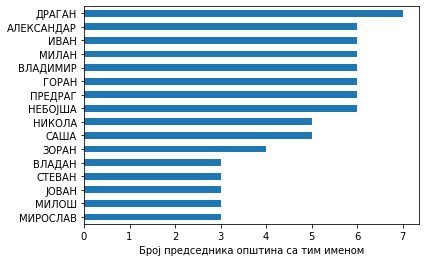

In [10]:
y=imena_serija.value_counts()[:16]
y.plot(kind='barh')
plt.xlabel('Број председника општина са тим именом')
plt.gca().invert_yaxis()

Ово је једноставан и прегледан начин да упоредимо резултате. Одмах видимо да је најчешће неки Драган председник општине, па Владимир, па Милан итд. . Примећујете ли нешто необично код ових имена? Сва су мушка. Има ли уопште председница општина у Србији. Колико?

Пошто у серији немамо податак о полу председника општина већ само име, требало би да на основу имена да проценимо ког су пола. Рачунар не зна које је име мушко, а које женско. Направићемо процену на основу __хеуристике__ (једноставног правила које углавном даје тачну процену). Једна таква хеуристика може да буде да се женска имена скоро увек завршавају на А.

Код сваке речи ћемо узети последње слово и проверити да ли је А. Појединачне карактере из текста у Пајтону можемо да издвајамо уз помоћ индекса у угластој загради. Тако ће нам __ime[0]__ дати прво слово, док ће нам __ime[-1]__ дати последње. У низ __pol__ ћемо ставити 0 за имена која се на завршавају на А и 1 за она која се завршавају тим словом. 

\* Важна напомена! Када проверавате које је које слово обавезно обратите пажњу на писмо. "А" и "А" нису исти карактер ако је једном слово писано латиницом, а други пут ћирицом.

In [11]:
pol=[]
for ime in imena_lista:
    if ime[-1]=="А":
        pol.append(1)
    else:
        pol.append(0)

Пошто у серији имамо само нуле и јединице, средња вредност низа ће нам рећи колики је удео јединица (односно имаена која се завршавају на А) у целом низу.

In [12]:
# удео јединица у низу
np.mean(pol)

0.2411764705882353

Чини се да имамо 25% председника општина чија се имена завршавају на А. Да ли су сви жене? Вероватно не. Хајде да првo направимо _DataFrame_ са две колоне: један са именом, друга са кôдом који одговара процењеном полу.

Овде ћемо _DataFrame_ направимо помоћу структуре речник (енг. _dictionary_). Нећемо се на томе много задржавати. Пробајте да варирате садржај у следећој ћелији да видите како то функционише. У сваком случају, овде смо одређеним ознакама (__Ime__ и __Pol__), придружили низове __imena_lista__ и __pol__. Помоћу функције `DataFrame()` Пајтон ће садржај речника __data__ спаковати у _DataFrame_ где су ознаке називи колона, а низови садржај тих колона. 

In [13]:
data={'Ime':imena_lista,'Pol':pol}
ime_df=pd.DataFrame(data)

In [14]:
ime_df

,Ime,Pol
0,МИРКО,0
1,ДАЛИБОР,0
2,БОЈАН,0
3,ПРЕДРАГ,0
4,ИВАНА,1
...,...,...
165,ДРАГАН,0
166,ПРЕДРАГ,0
167,СТАНА,1
168,ЗОРАН,0


Сада да видимо сва имена којима је додељен кôд 1.

In [15]:
ime_df[ime_df['Pol']==1]['Ime']

4           ИВАНА
5           ВЕСНА
9           ИВАНА
20          ИРЕНА
26        НЕБОЈША
27        НЕБОЈША
30           САША
41        НЕБОЈША
43         НИКОЛА
44        ВЛАДИЦА
51           САША
54        СНЕЖАНА
56         НИКОЛА
62        АНДРИЈА
71         МАЛИША
72        НЕБОЈША
73           САША
78         НИКОЛА
87        ДОБРИЦА
96         НИКОЛА
98     АЛЕКСАНДРА
100        МИЉАНА
101        МИЛЕНА
104        ЈОВИЦА
109       НЕБОЈША
113        НАТАША
116       НЕБОЈША
121       ДРАГАНА
122          САША
124        ЈЕЛЕНА
127      ДУБРАВКА
128         СТЕВА
131         ЈАСНА
133       МИРЈАНА
135       ДРАГАНА
142        НИКОЛА
144          САЊА
148          САША
153        СИНИША
160      СВЕТЛАНА
167         СТАНА
Name: Ime, dtype: object

Видимо да једноставна хеуристика, односно алгоритам који смо од ње направили имена као што су Небојша, Саша, Никола итд. такође разврстава као женска. Срећом нема их превише па можемо да их ставимо у низ изузетака и тако променимо кôд. Истина ни ми не знамо поуздано ког су пола Сања, Саша или Владица, али то неће много утицати на коначни резултат. Нас интересује процена.

У __for__ петљи по свим именима из списка изузетака одговарајућим именима ћемо додељивати кôд 0.  

In [16]:
for ime in ['НЕБОЈША','САША','НИКОЛА','МАЛИША','СИНИША','ЈОВИЦА','СТЕВА','АНДРИЈА','ДОБРИЦА']:
    ime_df.loc[ime_df['Ime']==ime,'Pol']=0

Да видимо сад колико има јединица у низу, односно председница међу председницима.

In [17]:
np.mean(ime_df['Pol'])

0.11176470588235295

Има их, изгледа, 11%. Графички то можемо да прикажемо овако:

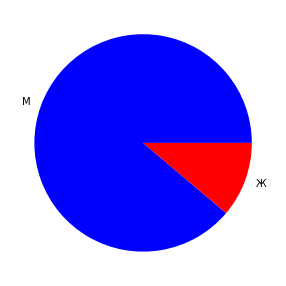

In [18]:
# графички то може да изгледа овако
plt.figure(figsize=(5,5))
plt.pie(ime_df['Pol'].value_counts(), labels=['М','Ж'],colors=['blue','red'])
plt.show()

### Претрага текста

Претрага текста може да буде произвољно компликована. За то постоје посебне библиотеке којима се овде нећемо бавити. За доста тога довољне су функције за рад са стринговима које Пајтон већ има. Навешћемо само неколико корисних функција.

Функција `count()` пробројава стингове у тексту. Тај стринг може да буде нпр. размак " ". Ако пребројимо размаке знаћемо колико има речи у тексту. 

In [19]:
tekst='Претрага текста може да буде произвољно компликована. За то постоје посебне библиотеке којима се овде нећемо бавити. За доста тога довољне су функције за рад са стринговима које Пајтон већ има. Навешћемо само неколико корисних функција.'
tekst.count(" ")

35

Помоћу функције `split()` можемо да поделимо текст на листу стрингова које одваја аргумент те функције. Видели смо како то ради кад смо раздвајали име и презиме. Слично можемо и да поделимо текст на реченице.

In [20]:
tekst.split(". ")

['Претрага текста може да буде произвољно компликована',
 'За то постоје посебне библиотеке којима се овде нећемо бавити',
 'За доста тога довољне су функције за рад са стринговима које Пајтон већ има',
 'Навешћемо само неколико корисних функција.']

Помоћу функције `find()` можемо да нађемо где се налази одговарајући стринг. Резултат ће бити индекс, односно редни број карактера у тексту где почиње тај стринг минус један.

In [21]:
tekst.find("библиотеке")

76

Помоћу функција `upper()` и `lower()` можемо да претварамо слова у велика и мала. То може да буде згодно код екстракције кључних речи где нам није битно да ли је каквим је словима записан термин. Замену текста неким другим можемо да урадимо помоћу функције `replace()`. Ево примера:

In [22]:
tekst.replace("произвољно", "произвољно".upper())

'Претрага текста може да буде ПРОИЗВОЉНО компликована. За то постоје посебне библиотеке којима се овде нећемо бавити. За доста тога довољне су функције за рад са стринговима које Пајтон већ има. Навешћемо само неколико корисних функција.'

Пошто је игра са стринговима заиста произвољно компликована, даље испитивање ових функција препуштамо вашем самосталном раду. Уместо тога, прелазимо на статистику стрингова. 

### Статистика токена

Анализа текста се заснива на статистици токена (знакова) у том тексту. Тај токен може да буде слово, слог, реч, синтагма итд. Сваки текст у дигиталном облику можемо да поделимо на токене и да их онда статистички обрађујемо. Уколико текст није чист (_plain text_) него има и контролне знакове, то неће бити сасвим једноставно. Врло често је неопходно да текст чистимо неколико пута како би био адекаватан за анализу. Да погледамо сада како би изгледала једноставна анализа овог пасуса.

Једноставна машинска анализа текста подразумева __чишћење текста__ (уклањање знакова интерпункције, уклањање речи ко праве шум, конверзија свих слова у мала, итд.) и __"токенизацију" очишћеног текста__, тј. раздвајање текста на појединачне токене. Иако би било добро прво да очистимо текст па да га токенизујемо, то није увек једноставно.

Пробаћемо како изгледа анализа на првом пасусу овог текста. Намерно ћемо овог пута прво урадити токенизацију па тек онда чишћење текста.

In [23]:
pasus="Анализа текста се заснива на статистици токена (знакова) у том тексту. Тај токен може да буде слово, слог, реч, синтагма итд. Сваки текст у дигиталном облику можемо да поделимо на токене и да их онда статистички обрађујемо. Уколико текст није чист (plain text) него има и контролне знакове, то неће бити сасвим једноставно. Врло често је неопходно да текст чистимо неколико пута како би био адекаватан за анализу. Да погледамо сада како би изгледала једноставна анализа овог пасуса."

У најједноставнијем случају, токени су појединачни карактери у тексту. То ћемо прво да пробамо. Направићемо листу токена (у овом случају знакова) који се налазе у том пасусу. Отворићемо на почетку празну листу __pasus_lista__ и потом додавати знак по знак у листу док не дођемо до краја пасуса. 

In [24]:
pasus_lista=[]
for slovo in range(0, len(pasus)):
    pasus_lista.append(pasus[slovo])

In [25]:
print(pasus_lista)

['А', 'н', 'а', 'л', 'и', 'з', 'а', ' ', 'т', 'е', 'к', 'с', 'т', 'а', ' ', 'с', 'е', ' ', 'з', 'а', 'с', 'н', 'и', 'в', 'а', ' ', 'н', 'а', ' ', 'с', 'т', 'а', 'т', 'и', 'с', 'т', 'и', 'ц', 'и', ' ', 'т', 'о', 'к', 'е', 'н', 'а', ' ', '(', 'з', 'н', 'а', 'к', 'о', 'в', 'а', ')', ' ', 'у', ' ', 'т', 'о', 'м', ' ', 'т', 'е', 'к', 'с', 'т', 'у', '.', ' ', 'Т', 'а', 'ј', ' ', 'т', 'о', 'к', 'е', 'н', ' ', 'м', 'о', 'ж', 'е', ' ', 'д', 'а', ' ', 'б', 'у', 'д', 'е', ' ', 'с', 'л', 'о', 'в', 'о', ',', ' ', 'с', 'л', 'о', 'г', ',', ' ', 'р', 'е', 'ч', ',', ' ', 'с', 'и', 'н', 'т', 'а', 'г', 'м', 'а', ' ', 'и', 'т', 'д', '.', ' ', 'С', 'в', 'а', 'к', 'и', ' ', 'т', 'е', 'к', 'с', 'т', ' ', 'у', ' ', 'д', 'и', 'г', 'и', 'т', 'а', 'л', 'н', 'о', 'м', ' ', 'о', 'б', 'л', 'и', 'к', 'у', ' ', 'м', 'о', 'ж', 'е', 'м', 'о', ' ', 'д', 'а', ' ', 'п', 'о', 'д', 'е', 'л', 'и', 'м', 'о', ' ', 'н', 'а', ' ', 'т', 'о', 'к', 'е', 'н', 'е', ' ', 'и', ' ', 'д', 'а', ' ', 'и', 'х', ' ', 'о', 'н', 'д', 'а', ' ',

Статистику ове листе ћемо лакше урадити ако је пребацимо у промељиву типа серија коју имамо у Pandas библиотеци. За податке тог типа имамо неколико статистичких функција. Једна од њих је `describe` која нам даје основну дескриптивну статистику: колико серија има елемената (count), колико их има јединствених (__unique__), који се најчешће појављују (__top__) и колико пута (__freq__). 

In [26]:
pasus_serija=pd.Series(pasus_lista)

In [27]:
pasus_serija.describe()

count     482
unique     44
top          
freq       77
dtype: object

У тексту који смо обрадили има 482 знака, од чега 44 јединствена. Иако изгледа да нема знака који се најчешће понавља, има га -- то је размак. Понавља се 75 пута. Коначно, __pasus_serija__ спада у објекте.  

Ова статистика нам не говори много о тексту. Зато би било боље да погледамо статистику свих знакова, односно да их пребројимо. Функција `value_counts` ради управо то. При томе ова функција сортира елементе почевши од најфреквентнијег.

In [28]:
pasus_serija.value_counts()

     77
а    50
о    43
и    34
т    33
е    31
н    27
с    24
к    23
д    16
л    15
м    12
в    10
у     9
з     8
г     7
б     7
ј     6
.     6
ч     5
п     5
р     4
,     4
(     2
ж     2
)     2
х     2
t     2
e     1
x     1
ђ     1
Д     1
i     1
А     1
У     1
ћ     1
n     1
p     1
С     1
Т     1
ц     1
l     1
a     1
В     1
dtype: int64

Најчешће се појављује " " (77 пута), па "а" (50), па "о" (43) итд. Ако прођете кроз целу листу видећете да се посебно појављују велика и мала слова, као и да ту има и знакова интерпункције. За фреквенцијску анализу слова није много важно колико се пута појављују заграде и да ли је слово на почетку реченице. Поједностављену анализу можемо да урадимо тако што ћемо написати нашу функцију `ciscenje()` која прво сва слова претвори у мала уз помоћ функције `lower`, замени све знаке интерпункције ",.,()\_" размацима помоћу функције `replace` и коначно избрише вишак размака тамо где их има помоћу функције `strip()`.

Уклањање знакова који нису слова може ефикасније да се уради помоћу регуларних израза (_regular expressions_), али ћемо то оставити за напредни курс.

In [29]:
def ciscenje(text):
    text=text.lower()
    text=text.replace(',', ' ')
    text=text.replace('.', ' ')
    text=text.replace('(', ' ')
    text=text.replace(')', ' ')
    text=text.replace('_', ' ')
    text=text.strip()
    return text

In [30]:
ciscenje(pasus)

'анализа текста се заснива на статистици токена  знакова  у том тексту  тај токен може да буде слово  слог  реч  синтагма итд  сваки текст у дигиталном облику можемо да поделимо на токене и да их онда статистички обрађујемо  уколико текст није чист  plain text  него има и контролне знакове  то неће бити сасвим једноставно  врло често је неопходно да текст чистимо неколико пута како би био адекаватан за анализу  да погледамо сада како би изгледала једноставна анализа овог пасуса'

Приметите како смо све кораке чишћења текста ставили у једну функцију и тако аутоматизовали овај процес. То је суштина скриптне обраде података. Кад коначно напишемо кôд, онда све можемо да извршимо у једном кораку.

Сад можемо да поновимо токенизацију, односно прављење листе токена са овако поједностављеним текстом и да онда израчунамо фреквенције.

In [31]:
pasus=ciscenje(pasus)
pasus_lista=[]
for znak in range(0, len(pasus)):
    pasus_lista.append(pasus[znak])
pasus_serija=pd.Series(pasus_lista)
pasus_serija.value_counts()

     90
а    51
о    43
т    34
и    34
е    31
н    27
с    25
к    23
д    17
л    15
м    12
в    11
у    10
з     8
г     7
б     7
ј     6
ч     5
п     5
р     4
ж     2
х     2
t     2
ћ     1
n     1
p     1
a     1
l     1
ц     1
e     1
ђ     1
i     1
x     1
dtype: int64

Чему би сад ово могло да послужи? На пример за препознавање језика на ком је писан текст. Фреквенција слова се значајно разликује међу језицима па чак и међу дијалектима. Несумњиво je да ће фреквенција слова __ј__ бити већа у јекавици него у екавици. Чак и кратке секвенце слова могу да укажу на језик којим је текст писан и за то не морамо да знамо језик. Машинама је довољно да низове фреквенци у некој реченици упореде са типичним фреквенцама у одређеним језицима и тако одреде који је језик у питању. У енглеском је, на пример, најфрекевентније слово __е__, док је у српском __а__. Јасно, уколико постоје специфична слова као што су __ћ__, __я__ или __Ψ__ идентификација ће бити тривијална. Машине су нам потребне за оно што није очигледно.

#### _n_-грам

Јасно, фрекевенције слова не могу много да нам кажу о садржају текста. Боље је да пробамо да статистиком речи. Основни концепт у рударењу текста је ___n_-грам__, тј. секвенцa од _n_ токена (најчешће знакова или речи) у неком већем тексту. Ако за токен узмемо реч, 1-грами су у овом тексту "Основни", "концепт", "у" итд., док су 2-грами "Основни концепт", "концепт у" итд.

Да бисмо видели моћ статистичке анализе токена, узећемо један (вама) непознати текст и анализирати га. Тај текст је мало већи и налази се у фајлу __"CELEX 32016R0679 EN TXT.txt"__. Нећемо га учитавати у _DataFrame_ као што смо то радили са табелама. Довољно је да га учитамо у променљиву типа стринг.

In [32]:
text=open('data\CELEX 32016R0679 EN TXT.txt').read()

In [33]:
type(text)

str

Да видимо прво шта се налази на почетку овог текста.

In [34]:
text[:200]

'Top <#d1e40-1-1>\n\n  * Top <#d1e40-1-1>\n  * CHAPTER I - General provisions <#d1e1374-1-1>\n      o Article 1- Subject-matter and objectives <#d1e1384-1-1>\n      o Article 2- Material scope <#d1e1404-1-1'

Изгледа, да овде имамо разних контролних кодова и тагова које треба уклонити. На основу ове кратке секвенце чини се да су тагови одвојени од речи у тексту. То би могло да нам помогне у чишћењу. Да видимо како би сада изгледало први неколико токена.

In [35]:
text.split()[:15]

['Top',
 '<#d1e40-1-1>',
 '*',
 'Top',
 '<#d1e40-1-1>',
 '*',
 'CHAPTER',
 'I',
 '-',
 'General',
 'provisions',
 '<#d1e1374-1-1>',
 'o',
 'Article',
 '1-']

In [36]:
# број токена
len(text.split())

56090

Постоји функција `isalpha()` која нам говори да ли је стринг обичан текст или не. То бисмо могли да искористимо и елиминишемо све што није текст. На пример, први токен из горње листе јесте текст док други није. Да видимо како то изгледа за први 15 токена.

In [37]:
for i in range(15):
    print(text.split()[i].isalpha(),'\t',text.split()[i])

True 	 Top
False 	 <#d1e40-1-1>
False 	 *
True 	 Top
False 	 <#d1e40-1-1>
False 	 *
True 	 CHAPTER
True 	 I
False 	 -
True 	 General
True 	 provisions
False 	 <#d1e1374-1-1>
True 	 o
True 	 Article
False 	 1-


Оваква елиминације вероватно неће радити 100% тачно јер постоје полусложенице, неке речи су под наводницима, имамо алфанумериче комбинације (слова и цифре заједно) итд. Свеједно, биће довољно добро за вежбу. Водећи се логиком да оно што није обичан текст треба избацити направићемо нову листу у којој ће бити само речи.

In [38]:
reci=[]
for token in text.split():
    if token.isalpha():
        reci.append(token)

In [39]:
len(reci)

49665

In [40]:
reci[:15]

['Top',
 'Top',
 'CHAPTER',
 'I',
 'General',
 'provisions',
 'o',
 'Article',
 'and',
 'objectives',
 'o',
 'Article',
 'Material',
 'scope',
 'o']

Издвајањем најфреквентнијих речи требало би да стекнемо утисак о чему је овај текст.

In [41]:
pd.Series(reci).value_counts()

the            4522
of             2922
to             2152
and            1547
in             1401
               ... 
Apart             1
itself            1
norms             1
behavioural       1
concrete          1
Length: 2456, dtype: int64

Ово сада већ личи на озбиљну статистику речи. Међутим, из ових неколико редова, ипак, не можемо да кажемо о чему је текст. Текст је очигледно на енглеском језику и најчешће речи су _the_, _of_, _to_ итд. Те најчешће речи су уобичајене за било који текст и неће нам много помоћи да проникнемо у суштину текста. Мораћемо да уклонимо те опште речи да бисмо дошли до оних информативнијих. У терминологији обраде података те речи којих има свугде, а не доприносе разумевању текста се зову _stop words_.

### Облак речи

Статистика токена може да се прикаже графички. Тај начин приказа се зове облак речи (енг. _word cloud_). Стандардне библиотеке не знају да га прикажу. Требаће нам једна посебна: __wordcloud__. Ако није инсталирана у вашем окружењу, потребно је да је инсталирате са `pip install wordcloud`.

In [42]:
from wordcloud import WordCloud

Библиотека __wordcloud__ није само за графичко приказивање. Она има функције које раде много тога што нам је потребно за анализу текста. Функција `wordcloud()` зна да елеминише све што није чист текст, зна шта су _stop words_ и како да их елиминише. Штавише, зна да издвоји као посебне токене комбинације од две речи које се често појављују у тексту.

Ми ћемо само да пребацимо сва слова у мала се токени не би непотребно раздвајали.

In [43]:
text=text.lower()

Као аргументе за функцију `WordCloud()` ћемо ставити __collocation_threshold=3__ што значи да не тражи _n_-граме веће од три речи, __min_word_length=3__ да игнорише речи краће од три слова и __max_words=300__ да ограничи број речи на 300. Остала два аргумента одређују величину слике.

In [44]:
wordcloud = WordCloud(collocation_threshold=3,min_word_length=3,
                      width=1000, height=600, max_words=300).generate(text)

Коначно, да прикажемо графикон. Кад га Пајтон исцрта, предлажем да га отворите у посебном прозору како бисте видели целу слику. 

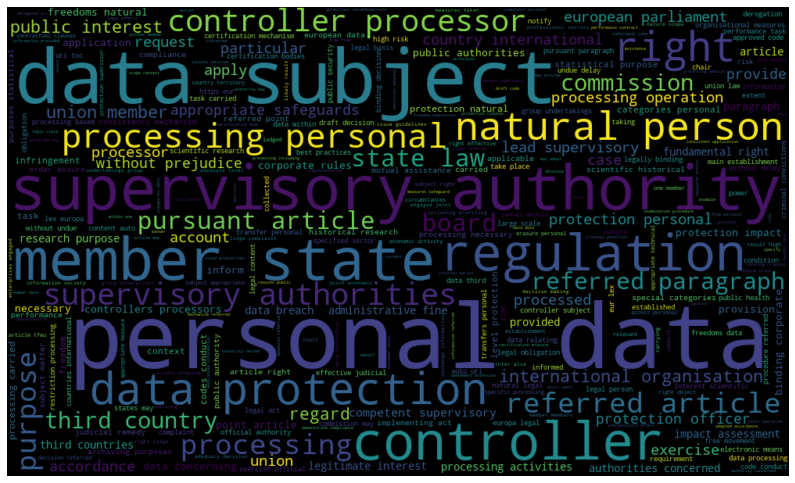

In [45]:
plt.figure(figsize=(14,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off");

In [46]:
wordcloud.to_file("GDPR wordcloud.png")

Шта видите на графикону? Најчешће коришћени термини су лични подаци (_personal data_), заштита података (_data protection_), физичко лице (_natural person_), земља чланица (_member state_) итд. Шта мислите о чему је текст? У питању је GDPR, директива Европске уније која се тиче заштите података о личности.

Иако се обрада текстуалних података не бави смислом текста, пажљива анализа садржаја на нивоу статистике токена лако може да обради велики текст и прикаже најважније елементе. Наравно, у анализи може да се иде даље. Први корак даље се назива процесирање природног језика или NLP (енг. _Natural Language Processing_). О томе ће, вероватно, бити више речи у неком наредном, напредном курсу.